In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataframe = pd.read_csv('/content/Zomato-data-.csv')
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Data Cleaning

In [ ]:
def handleRate(value):
  value = str(value).split('/')
  value=value[0];
  return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [ ]:
dataframe.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


/tmp/ipython-input-8-3892228033.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='listed_in(type)', data=dataframe, palette='Set2')


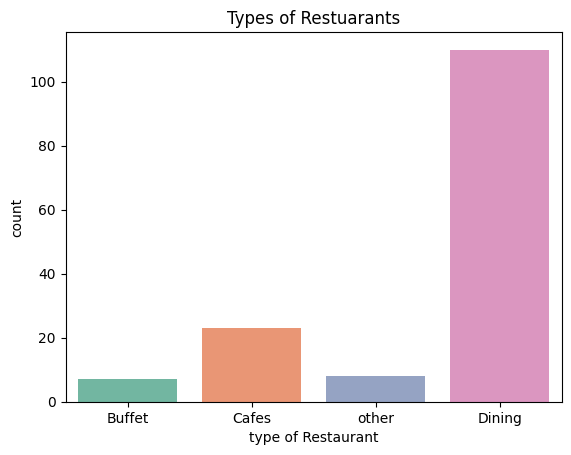

In [ ]:
sns.countplot(x='listed_in(type)', data=dataframe, palette='Set2')
plt.title('Types of Restuarants')
plt.xlabel("type of Restaurant")
plt.show()

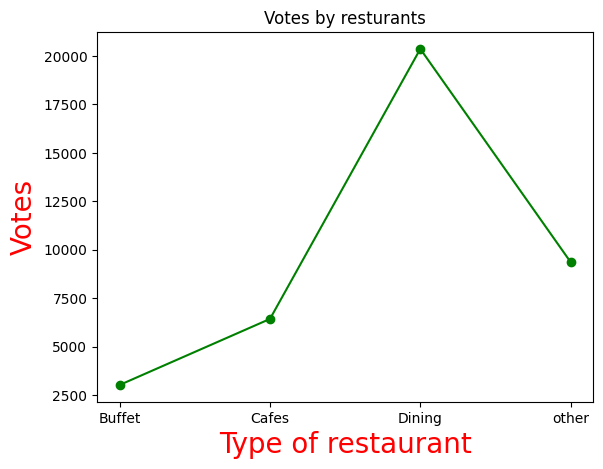

In [ ]:
grouped_data = dataframe.groupby('listed_in(type)') ['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.title('Votes by resturants')
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes' , c='red' , size=20)
plt.show()

In [ ]:
max_votes =dataframe['votes'] .max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes']== max_votes, 'name']
print ('Restaurant(s) with the maximum votes:')
print (restaurant_with_max_votes)




Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


/tmp/ipython-input-15-2909036409.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe['online_order'] , palette= 'Set2')


<Axes: xlabel='online_order', ylabel='count'>

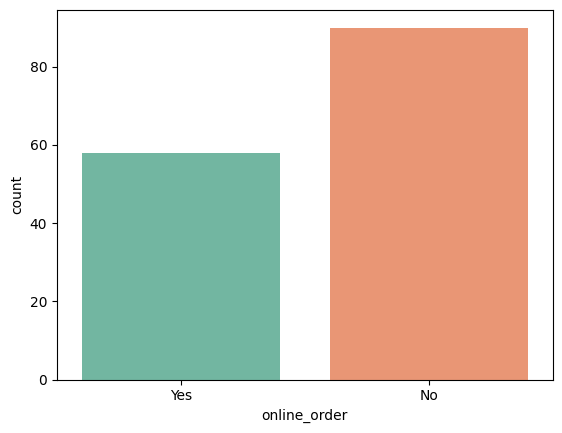

In [ ]:
sns.countplot(x=dataframe['online_order'] , palette= 'Set2')

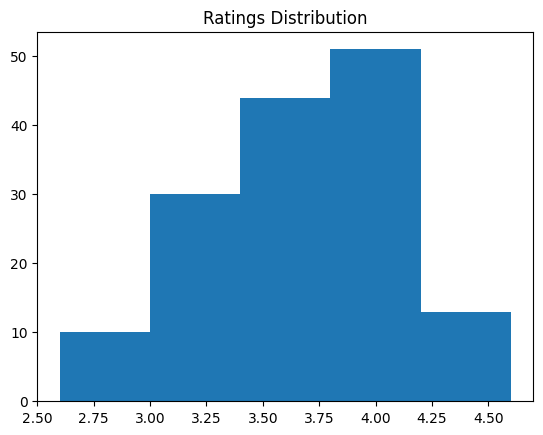

In [ ]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

/tmp/ipython-input-22-4181878371.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data, palette='Set2')


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

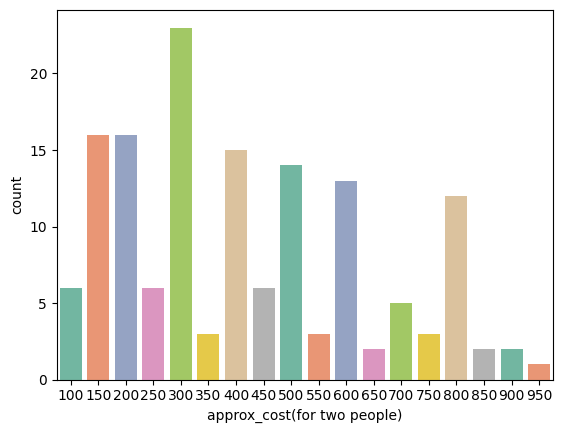

In [ ]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, palette='Set2')

/tmp/ipython-input-26-2007994576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'online_order' , y='rate' , data= dataframe, palette='Set2')


<Axes: xlabel='online_order', ylabel='rate'>

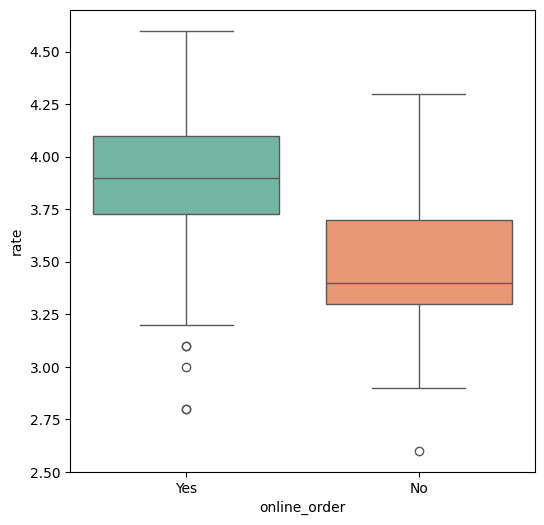

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order' , y='rate' , data= dataframe, palette='Set2')


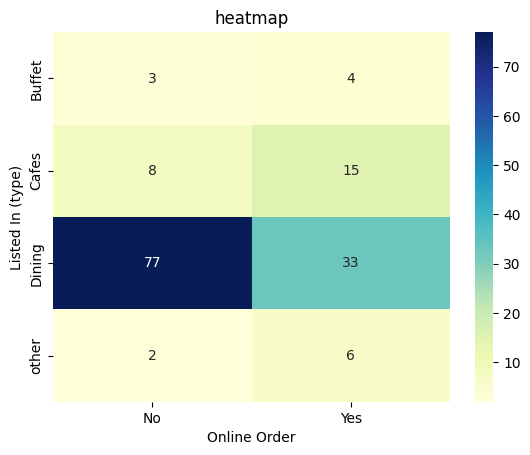

In [ ]:
pivot_table = dataframe.pivot_table(index = 'listed_in(type)' , columns='online_order',aggfunc='size' , fill_value=0)
sns.heatmap(pivot_table , annot= True , cmap='YlGnBu', fmt  = 'd')
plt.title('heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (type)')
plt.show()